### Case Study: How Does a Bike-Share Navigate Speedy Success?
This case study is part of the Capstone of the Google Data Analytics Professional Certificate

### Introduction
The bike-share company Cyclistic, in Chicago wants to analyze how casual riders and annual members use Cyclistic bikes differently because they want to desing a strategy to increase the annual member.

As a part of this project, analyzing historical data, I want to answer the questions, whether there is or no difference between those types of users.

In order to answer the key business questions, I will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

### Phase 1: Ask
Key tasks :

The business task

    How annual members and casual riders use Cyclistic bikes differently because the company want to increase the number of annual members.

Key stakeholders

    Lily Moreno: the director of marketing, believes that the future of the company depends on maximizing the number of annual memberships.

### Phase 2: Prepare

- Data is locates at https://divvy-tripdata.s3.amazonaws.com/index.html
- Data is organiszed in a folder containing 12 subfolders have 12 csv files from September 2021 to September 2022.
- The data is ROCCC because it's reliable, original, comprehensive, current and cited.
- The company has their own licence over the dataset. Besides that, the dataset doesn't have any personal information about the riders.

### Phase 3: Process
As the csv files are in 12 different, I have merged them together into a single Dataframe.


### Importing necessary libraries

In [1]:
import pandas as pd

In [2]:
# Importing monthly data on bike-share navigation

df1 = pd.read_csv('202109-divvy-tripdata.csv')
df2 = pd.read_csv('202110-divvy-tripdata.csv')
df3 = pd.read_csv('202111-divvy-tripdata.csv')  
df4 = pd.read_csv('202112-divvy-tripdata.csv')
df5 = pd.read_csv('202201-divvy-tripdata.csv')
df6 = pd.read_csv('202202-divvy-tripdata.csv')
df7 = pd.read_csv('202203-divvy-tripdata.csv')
df8 = pd.read_csv('202204-divvy-tripdata.csv')
df9 = pd.read_csv('202205-divvy-tripdata.csv')
df10 = pd.read_csv('202206-divvy-tripdata.csv')
df11 = pd.read_csv('202207-divvy-tripdata.csv')
df12 = pd.read_csv('202208-divvy-tripdata.csv')
df13 = pd.read_csv('202209-divvy-publictripdata.csv')

In [3]:
# combining all data frames into one

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13], axis = 0)

### EDA (Exploratory Data Analysis)

In [4]:
# snapshot of data collected
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


In [5]:
# information about data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6584382 entries, 0 to 701338
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 703.3+ MB


In [6]:
# checking for null values 
df.isnull().sum()

# lots of information about data station, names is missing it can be cleaned, however it is not needed
# for the business questions asked. So we can remove the trajectory performer, but still have enough data to work with.

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     988145
start_station_id       988143
end_station_name      1057488
end_station_id        1057488
start_lat                   0
start_lng                   0
end_lat                  6439
end_lng                  6439
member_casual               0
dtype: int64

In [7]:
# checking for duplicated rows.  
df.duplicated().sum()

0

In [8]:
# creation of new data frame with only necessary information for analysis

new_df = df[['rideable_type','started_at','ended_at','member_casual','start_lat','start_lng','end_lat','end_lng']]

# since the end_lat and end_lng has a small amount of null values and it will not interfer with the analysis of the data we can dropp the null values
new_df.dropna(axis=0, inplace=True)

# checking that all null values were dropped correctly
new_df.isnull().sum()

/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/3682524719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(axis=0, inplace=True)


rideable_type    0
started_at       0
ended_at         0
member_casual    0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
dtype: int64

In [10]:
# converting 'started_at' and 'ended_at' to datetime to be better analyzed

new_df['started_at'] = pd.to_datetime(new_df['started_at'])
new_df['ended_at'] = pd.to_datetime(new_df['ended_at'])

/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/2105244608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['started_at'] = pd.to_datetime(new_df['started_at'])
/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/2105244608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ended_at'] = pd.to_datetime(new_df['ended_at'])


In [12]:
# confirming new data type of 'started_at' and 'ended_at' columns are datetime
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577943 entries, 0 to 701338
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   rideable_type  object        
 1   started_at     datetime64[ns]
 2   ended_at       datetime64[ns]
 3   member_casual  object        
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 451.7+ MB


In [13]:
# checking the number of trips made by members vs casual riders
new_df['member_casual'].value_counts()

member    3818373
casual    2759570
Name: member_casual, dtype: int64

In [14]:
# understanting the type of bikes and more often used.
new_df['rideable_type'].value_counts()

classic_bike     3198908
electric_bike    3153770
docked_bike       225265
Name: rideable_type, dtype: int64

In [22]:
# creating a start coordinate and end coordinate, so we can calculate later on the distance of each trip, considering the rider did not do a loop 
# (he went to a location and left the bike in a different bike station)

new_df['start_coord'] = new_df[['start_lat','start_lng']].apply(tuple, axis=1)
new_df['end_coord'] = new_df[['end_lat','end_lng']].apply(tuple,axis=1)

new_df.head()

/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/1515745572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['start_coord'] = new_df[['start_lat','start_lng']].apply(tuple, axis=1)
/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/1515745572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['end_coord'] = new_df[['end_lat','end_lng']].apply(tuple,axis=1)


,rideable_type,started_at,ended_at,member_casual,start_lat,start_lng,end_lat,end_lng,start_coord,end_coord
0,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,casual,41.89,-87.68,41.89,-87.67,"(41.89, -87.68)","(41.89, -87.67)"
1,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,casual,41.94,-87.64,41.98,-87.67,"(41.94, -87.64)","(41.98, -87.67)"
2,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,casual,41.81,-87.72,41.80,-87.72,"(41.81, -87.72)","(41.8, -87.72)"
3,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,casual,41.80,-87.72,41.81,-87.72,"(41.8, -87.72)","(41.81, -87.72)"
4,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,casual,41.88,-87.74,41.88,-87.71,"(41.88, -87.74)","(41.88, -87.71)"


## Data Transformation

In [30]:
# creating the distance travelled for each rider, considering the station that the bike was picked up and the station the bike was dropped off

# importing library to calculate the distance between two different coordinate points. 
import geopy.distance

def distancer(row):
    '''
    getting the distance from each row start and end coordinates and returning the distance between the two points in KM.
    '''
    coords_1 = row['start_coord']
    coords_2 = row['end_coord']
    return geopy.distance.geodesic(coords_1, coords_2).km

# adding a new column with the distance in km between the start and end point of the bike ride
new_df['distance_km'] = new_df.apply(distancer, axis=1)

/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/1747472328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['distance_km'] = new_df.apply(distancer, axis=1)


In [33]:
# checking the distance_km column created on the dataframe

new_df.head()

,rideable_type,started_at,ended_at,member_casual,start_lat,start_lng,end_lat,end_lng,start_coord,end_coord,distance_km
0,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,casual,41.89,-87.68,41.89,-87.67,"(41.89, -87.68)","(41.89, -87.67)",0.829933
1,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,casual,41.94,-87.64,41.98,-87.67,"(41.94, -87.64)","(41.98, -87.67)",5.091652
2,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,casual,41.81,-87.72,41.80,-87.72,"(41.81, -87.72)","(41.8, -87.72)",1.110695
3,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,casual,41.80,-87.72,41.81,-87.72,"(41.8, -87.72)","(41.81, -87.72)",1.110695
4,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,casual,41.88,-87.74,41.88,-87.71,"(41.88, -87.74)","(41.88, -87.71)",2.490187


In [35]:
# seeing the difference between members and casuals on trip distance

new_df.groupby('member_casual')['distance_km'].mean()

member_casual
casual    2.229727
member    2.099361
Name: distance_km, dtype: float64

In [40]:
# understaning the duration of each bike trip
new_df['ride_duration'] = (new_df['ended_at'] - new_df['started_at']) / pd.Timedelta(minutes=1)

/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/1167123630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ride_duration'] = (new_df['ended_at'] - new_df['started_at']) / pd.Timedelta(minutes=1)


In [14]:
# seeing the average duration length of bike trips between members and casual riders
new_df.groupby(['member_casual'])['ride_duration'].mean()

member_casual
casual    29.155933
member    12.864634
Name: ride_duration, dtype: float64

In [52]:
# collecting date, day_of_week, month and year, and Month_year from 'started_at
import datetime
from datetime import date

new_df['date'] = pd.to_datetime(new_df['started_at']).dt.date # getting the date of the bike trip
new_df['day_of_week'] = new_df['started_at'].dt.day_name() # getting the day_of_week of the bike trip
new_df['month'] = new_df['started_at'].dt.month # getting the month of the bike trip
new_df['year'] = new_df['started_at'].dt.year # getting the year of the bike trip
new_df['month_year'] = new_df['started_at'].dt.to_period('M') # getting the month_year of the bike trip

new_df.head()

/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/3496812706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['started_at']).dt.date
/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/3496812706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day_of_week'] = new_df['started_at'].dt.day_name()
/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/3496812706.py:7: SettingWithCopyWarning: 
A value is trying to be set on 

,rideable_type,started_at,ended_at,member_casual,start_lat,start_lng,end_lat,end_lng,start_coord,end_coord,distance_km,date,day_of_week,month_year,Day_id,ride_duration,month,year
495574,classic_bike,2021-09-26 12:33:38,2021-09-26 12:46:17,member,41.966400,-87.688704,41.940600,-87.678500,"(41.966399801840986, -87.68870428204536)","(41.9406, -87.6785)",2.987929,2021-09-26,Sunday,2021-09,0,12.650000,9,2021
37983,classic_bike,2021-09-12 18:31:11,2021-09-12 18:40:24,casual,41.893992,-87.629318,41.907993,-87.631501,"(41.893992, -87.629318)","(41.907993, -87.631501)",1.565625,2021-09-12,Sunday,2021-09,0,9.216667,9,2021
37984,classic_bike,2021-09-26 11:47:32,2021-09-26 11:56:01,casual,41.893992,-87.629318,41.907993,-87.631501,"(41.893992, -87.629318)","(41.907993, -87.631501)",1.565625,2021-09-26,Sunday,2021-09,0,8.483333,9,2021
616634,electric_bike,2022-09-11 17:53:45,2022-09-11 18:00:33,member,41.890000,-87.660000,41.903450,-87.667747,"(41.89, -87.66)","(41.90345, -87.667747)",1.626364,2022-09-11,Sunday,2022-09,0,6.800000,9,2022
616624,classic_bike,2022-09-04 15:31:22,2022-09-04 15:42:53,member,41.903029,-87.697474,41.903450,-87.667747,"(41.903029, -87.697474)","(41.90345, -87.667747)",2.467075,2022-09-04,Sunday,2022-09,0,11.516667,9,2022


In [53]:
# sorting so that day_of_week appears on the chronological order, and not an arbitrary order. 
# in this sorted manner Sunday will be the first day of the week and Saturday will be the last day of the week.

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

new_df['Day_id'] = new_df['day_of_week'].map(sorterIndex)


/var/folders/wx/vd1lhmjn7xz10rb8z09shxyw0000gn/T/ipykernel_7999/105173189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day_id'] = new_df['day_of_week'].map(sorterIndex)


### Phase 4: Analyze

In [54]:
# seeing in a table manner the ride duration of members vs casuals troughout the year 

pd.pivot_table(new_df, values='ride_duration',index=['member_casual'],columns=['month_year'])

month_year,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09
member_casual,,,,,,,,,,,,,
casual,26.666988,24.173512,20.068153,21.283059,23.739058,22.090102,25.738079,23.353435,25.542022,23.375420,23.292270,21.418769,19.973108
member,13.482239,12.257701,11.084033,10.836995,11.613123,11.057793,11.743417,11.364730,13.064651,13.653017,13.433468,13.081240,12.611991


In [56]:
# seeing in a table manner the ride duration of members vs casuals troughout the days of the week

pd.pivot_table(new_df,values='ride_duration',index=['member_casual'],columns=['day_of_week'])

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,21.781405,24.131609,26.002080,27.156336,20.613104,20.448151,20.136934
member,12.368963,12.226396,14.046103,14.026152,12.114881,11.917926,11.979390


In [57]:
# seeing in a table manner the number of trips of members vs casuals of the different types of bikes available

pd.pivot_table(new_df,values='date',index=['member_casual'],columns=['rideable_type'], aggfunc = 'count')

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1133855.0,225265.0,1400450.0
member,2065053.0,NaN,1753320.0


In [67]:
# seeing in a table manner the average distance of trips of members vs casuals troughout the days of the week

pd.pivot_table(new_df, values ='distance_km', index = 'member_casual', columns= 'day_of_week' )



day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,2.205847,2.151150,2.342808,2.299915,2.186307,2.146312,2.162514
member,2.065624,2.052958,2.205538,2.163371,2.084982,2.062231,2.084867


## Visualizing the data

In [68]:
# importing visualization/graphing libraries 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

### Graph 1 

Graphing out the percentage of members vs casual riders of the bike share app 

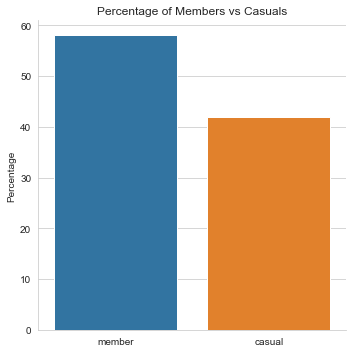

In [72]:
graph1 = new_df['member_casual'].value_counts(normalize=True) # normaliza = True to make it as a percentage
graph1 = graph1.mul(100).rename('Percent').reset_index() 

g1 = sns.catplot(x='index', y='Percent', kind='bar', data=graph1)
g1.set_axis_labels("", "Percentage")
g1.set(title='Percentage of Members vs Casuals');

### Graph 2 

Graphing most used bikes in the stations as a percentage

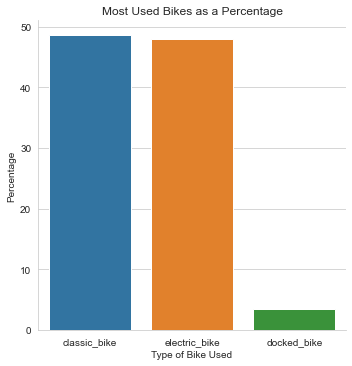

In [73]:
graph2 = new_df['rideable_type'].value_counts(normalize=True)
graph2 = graph2.mul(100).rename('Percent').reset_index()

g2 = sns.catplot(x='index', y='Percent', kind='bar', data=graph2)
g2.set_axis_labels("Type of Bike Used", "Percentage")
g2.set(title='Most Used Bikes as a Percentage');

### Graph 3

Graphing the Trip duration by members vs casual riders

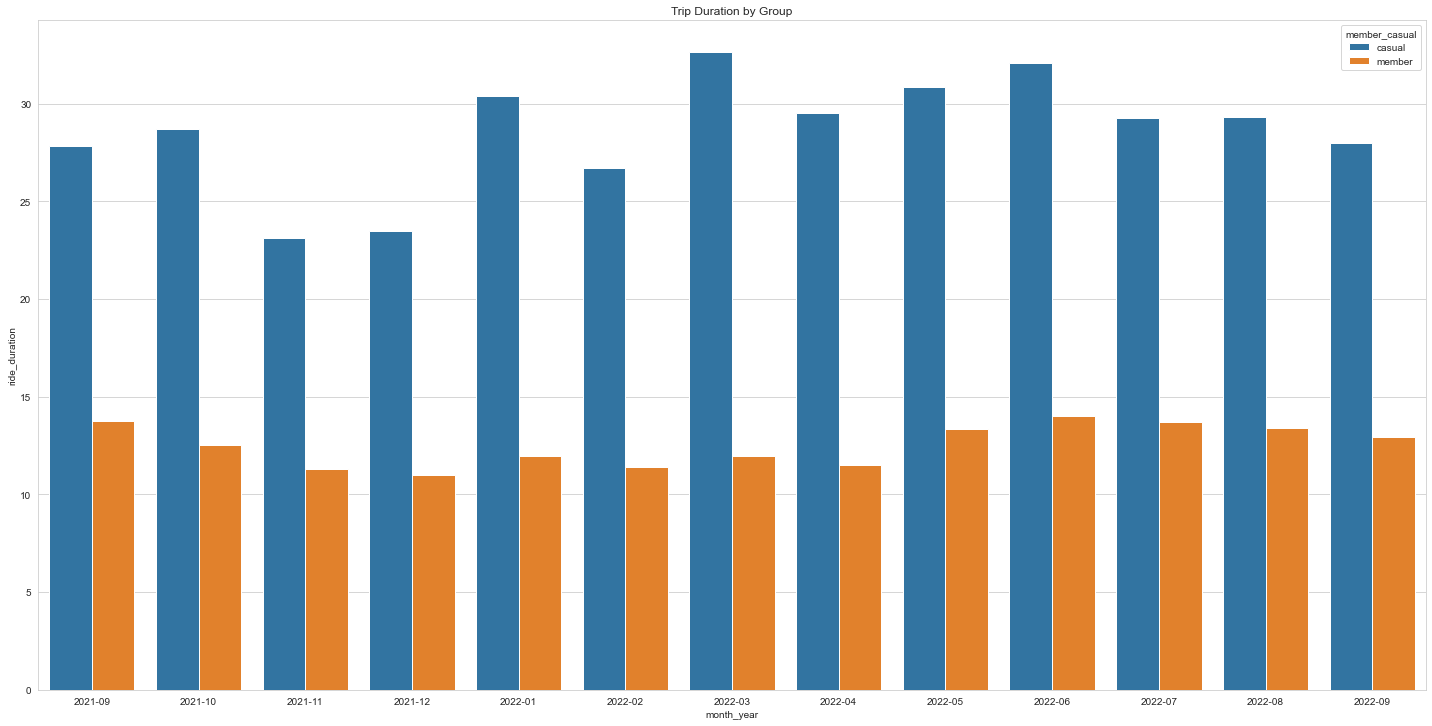

In [56]:
graph3 = new_df[['member_casual','month_year', 'ride_duration']].groupby(['member_casual', 'month_year'], as_index = False).agg({'ride_duration': 'mean'}).sort_values(['month_year'],ascending = True)

time = ['2021 Sep', '2021 Oct', '2021 Nov', '2021 Dec', '2022 Jan', '2022 Feb', '2022 Mar', '2022 Apr', '2022 May', '2022 Jun', '2022 Jul', '2022 Aug', '2022 Sep']

plt.figure(figsize = (20, 10))
sns.set_style("whitegrid")
sns.barplot(data=graph3, x='month_year' ,y="ride_duration" , hue='member_casual')
plt.tight_layout() 
plt.title('Trip Duration by Group');

### Graph 4

Graphing the count trips by members vs casuals troughout the year

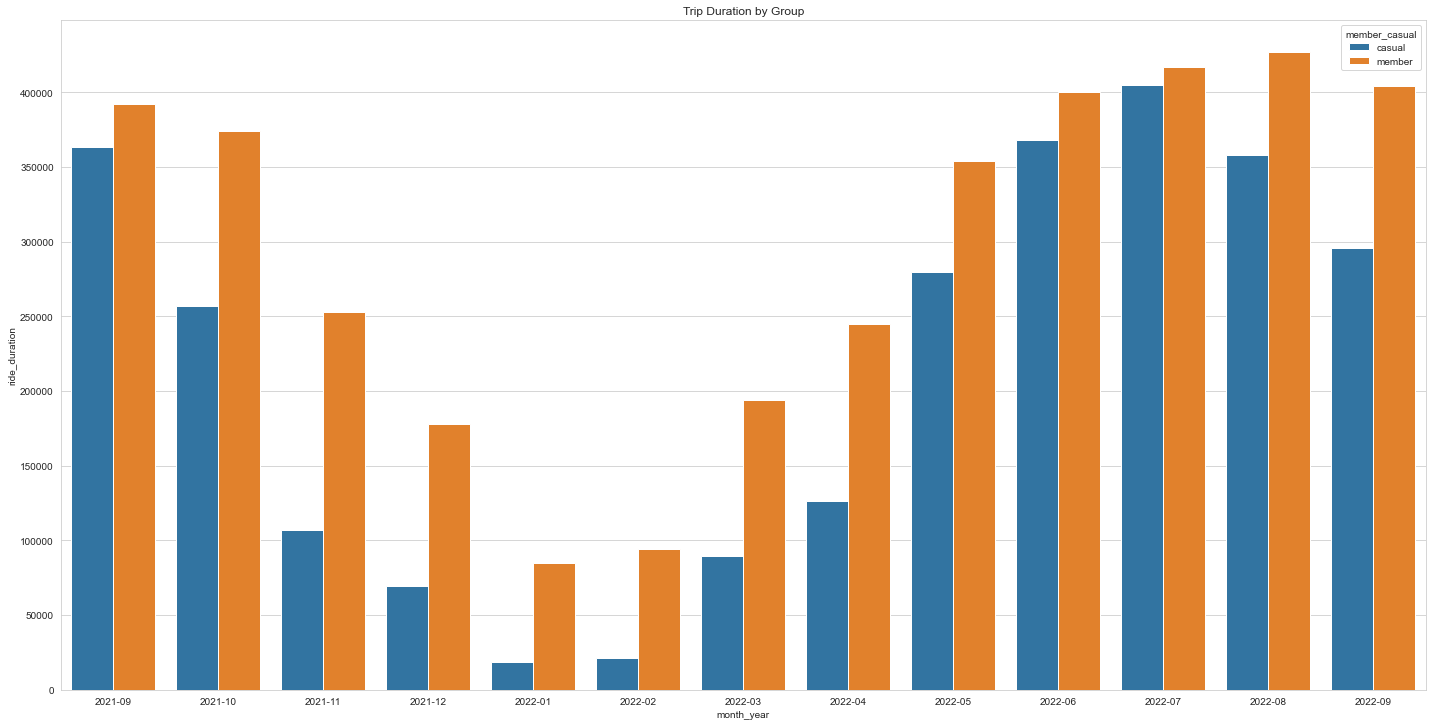

In [75]:
graph4 = new_df[['member_casual', 'month_year','ride_duration']].groupby(['member_casual', 'month_year'], as_index = False).agg({'ride_duration': 'count'}).sort_values(['month_year'],ascending = True)
time = ['2021 Sep', '2021 Oct', '2021 Nov', '2021 Dec', '2022 Jan', '2022 Feb', '2022 Mar', '2022 Apr', '2022 May', '2022 Jun', '2022 Jul', '2022 Aug', '2022 Sep']

plt.figure(figsize = (20, 10))
sns.set_style("whitegrid")
sns.barplot(data=graph4, x='month_year' ,y="ride_duration" , hue='member_casual')
plt.tight_layout() 
plt.title('Trip Duration by Group');

### Graph 5

Graphing average trip by day of the week for group of riders

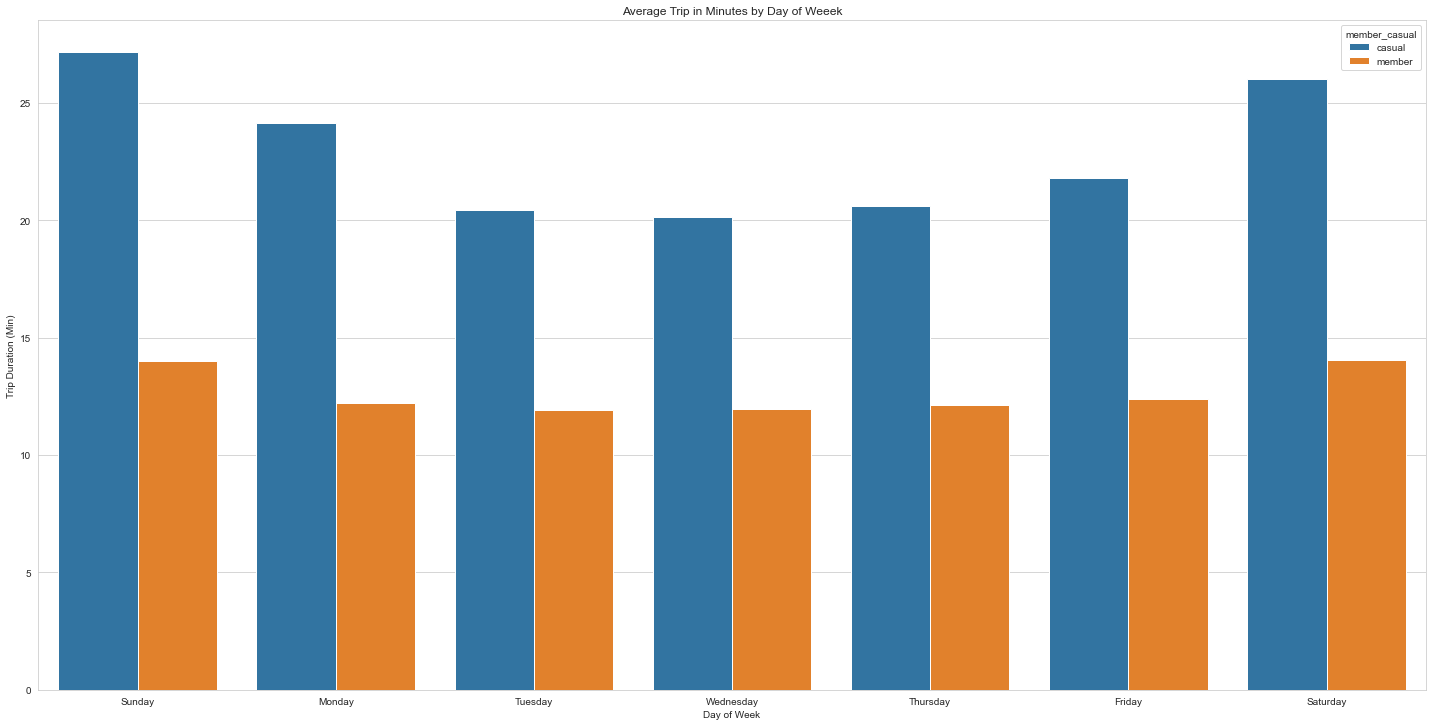

In [77]:
graph5 = new_df[['member_casual', 'day_of_week','ride_duration','Day_id']].groupby(['member_casual', 'day_of_week','Day_id'], as_index = False).agg({'ride_duration': 'mean'}).sort_values('Day_id')


plt.figure(figsize = (20, 10))
sns.set_style("whitegrid")
sns.barplot(data=graph5, x='day_of_week' ,y="ride_duration" , hue='member_casual')
plt.tight_layout() 
plt.xlabel("Day of Week")
plt.ylabel("Trip Duration (Min)")
plt.title('Average Trip in Minutes by Day of Weeek');

### Graph 6

Graphing the count trips by day of the week 

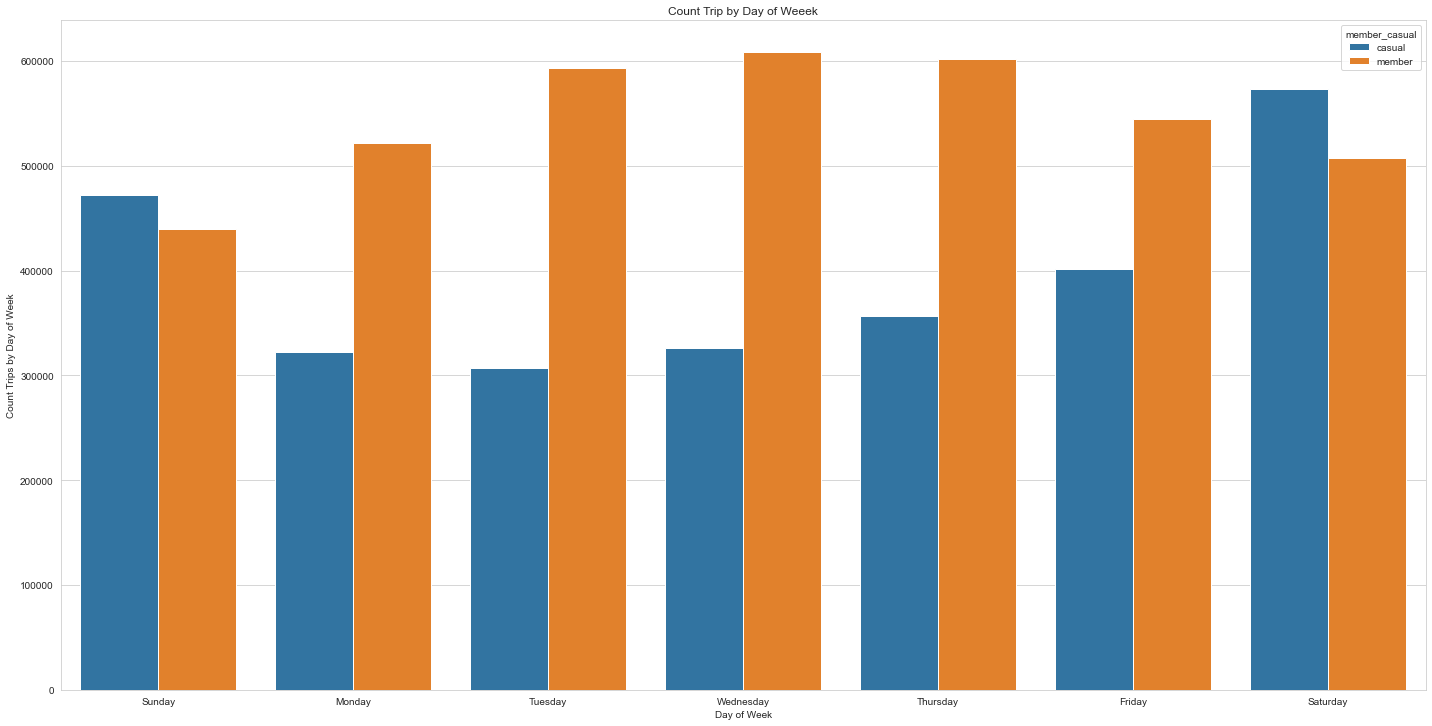

In [78]:
graph6 = new_df[['member_casual', 'day_of_week','ride_duration','Day_id']].groupby(['member_casual', 'day_of_week','Day_id'], as_index = False).agg({'ride_duration': 'count'}).sort_values(['Day_id'],ascending = True)


plt.figure(figsize = (20, 10))
sns.set_style("whitegrid")
sns.barplot(data=graph6, x='day_of_week' ,y="ride_duration" , hue='member_casual')
plt.tight_layout() 
plt.xlabel("Day of Week")
plt.ylabel("Count Trips by Day of Week")
plt.title('Count Trip by Day of Weeek');

### Graph 7

Graphing lenght trips by day of the week of members and casual riders

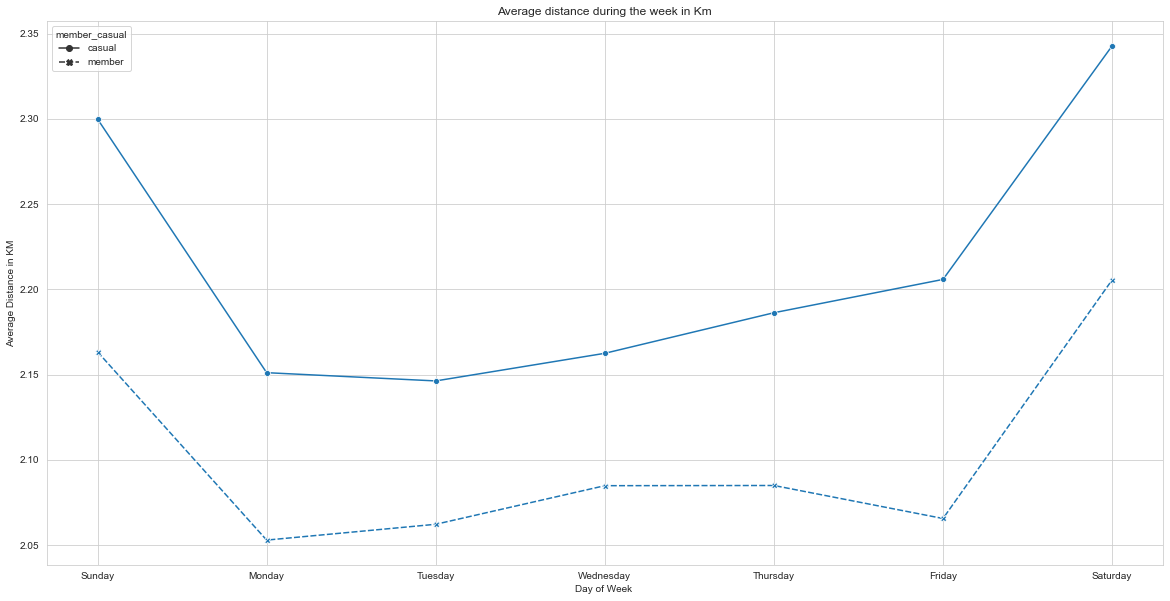

In [87]:
graph7 = new_df[['member_casual', 'day_of_week','distance_km','Day_id']].groupby(['member_casual', 'day_of_week','Day_id'], as_index = False).agg({'distance_km': 'mean'}).sort_values(['Day_id'],ascending = True)

plt.figure(figsize = (20, 10))
sns.set_style("whitegrid")
g7 = sns.lineplot(data = graph7, x = 'day_of_week', y = 'distance_km',  style = 'member_casual', markers = True)
g7.set(xlabel = 'Day of Week ', ylabel = 'Average Distance in KM')
plt.title('Average distance during the week in Km');

### Phase 5: Share
The share phase is usually done by building a presentation. In this notebook it was done the analysis & conclusion, and creating visualizations to better understand the 

### Conclusion
1. Member riders can be seen riding more often during the week with shorter duration time, most likely showing that they are using the bike share for their daily commute, where the casual riders are using the bikes more frequently on the weekend, and with longer duration than the members, which shows that the casual riders are using the bike for 
leisure, and without rush, compared to the members. 

2. Summer months like July, August & September are more popular and company can focus on this period to maximise their profits. Special 'Summer Membership' can be introduced specifically for casual riders who're hesitant to go for annual membership.

3. Have memberships for Casual riders based on the duration of the trips, since Casual riders go on average above 20 minutes every day of the week that they ride having a membership based on longer duration would be interesting for the "leisure" type of riders. 

4. Developing a "weekend membership" can drive conversion from Casual riders to members, since casual riders go more frequently and longer during the weekend, that can be a good entry point to conver the casual riders to members of the bike-share program.
